 # Knn on Diabetes dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X_train=pd.read_csv(r"C:\Users\anshu\Downloads\Training Data/Diabetes_XTrain.csv")
Y_train=pd.read_csv(r"C:\Users\anshu\Downloads\Training Data/Diabetes_YTrain.csv")
print(X_train.head(2))
#print(Y_train.head(2))
X_train=np.array(X_train)
Y_train=np.array(Y_train)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            7      168             88             42      321  38.2   
1            8      110             76              0        0  27.8   

   DiabetesPedigreeFunction  Age  
0                     0.787   40  
1                     0.237   58  


In [8]:
Y_train=Y_train.reshape((-1,))
Y_train.shape

(576,)

In [20]:
df=pd.read_csv(r"C:\Users\anshu\Downloads\Diabetes_Xtest.csv")
X_test=np.array(df)
X_test.shape

(192, 8)

 # KNN

In [54]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
def knn(X,Y,query,k):
    val=[]
    for i in range(X.shape[0]):
        distance=dist(query,X[i])
        val.append((distance,Y[i]))
        
    val=sorted(val)
    val=val[:k]
    val=np.array(val)
    new_val= np.unique(val[:,1],return_counts=True)
    #print(val[0]) 
    idx=new_val[1].argmax()
    val=new_val[0][idx]
    return int(val)
prediction=[]
for i in range(X_test.shape[0]):
    pred=knn(X_train,Y_train,X_test[i],15)
    prediction.append(pred)


# Prediction

In [55]:
prediction=np.array(prediction)
df = pd.DataFrame(data=prediction)

In [50]:
prediction.shape

(192,)

In [56]:
df = pd.DataFrame(data=prediction)

In [52]:
df

,0
0,1
1,0
2,0
3,0
4,0
5,1
6,1
7,0
8,0
9,0


In [57]:
df.to_csv("Diabetes_pred.csv",index=False)

# Bar Graph

In [62]:
h=np.unique(Y_train,return_counts=True)
h1=h[1][0]
h2=h[1][1]

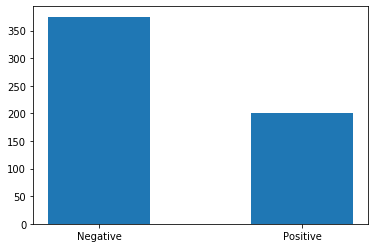

In [67]:
plt.bar([0,1],height=[h1,h2],width=0.5,tick_label=['Negative', 'Positive'])
plt.show()